In [1688]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv


In [1689]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [1690]:
df = pd.read_csv("car_price_prediction.csv")
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


## Data Cleaning

General Information of the dataset:

In [1691]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

#### Removing duplicates:

In [1692]:
# Check for duplicates
print(f"Number of duplicates: {len(df) - len(df.drop_duplicates())}")
df = df.drop_duplicates()

# Drop ID because its values have no meaning
df = df.drop("ID", axis= 1)

Number of duplicates: 313


#### Check Missing values
There is "-" in Levy.

In [1693]:
# Check for Nan values
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col} {df[col].unique()} \n")

Levy ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '877' '1236' '1141' '397' '784' '1024' '1357' '13

## Response Variable
'Price' is in integer. Assume that the price is in USD, according to the graph below, there are many cheap cars that are unrealistic. Therefore, I will only keep those datasets with price over 500$.

<Axes: xlabel='Price', ylabel='Count'>

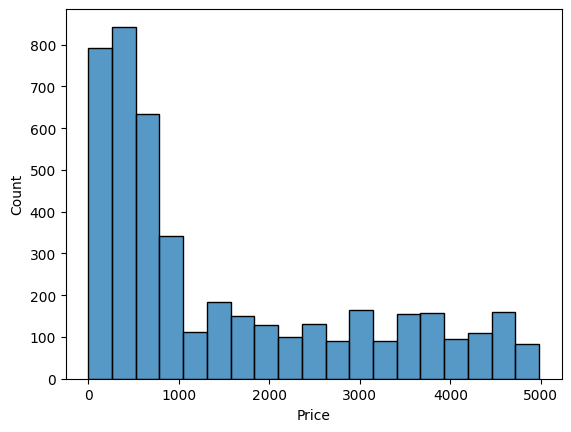

In [1694]:
sns.histplot(df[df["Price"] < 5000]["Price"])

In [1695]:
cleaned_df = df[df["Price"] > 500]

Furthermore, there are some outliers that can strongly affect the model according to the box plot. It is very difficult to see the distribution like this.

In [1696]:
def my_quantiles(df, col):
    print(f"Quantiles:\n {df[col].quantile([0.25, 0.5, 0.75])}\n")
    print(f"min-max: {df[col].min()} - {df[col].max()}")
    print(f"mean: {df[col].mean()}")

Quantiles:
 0.25     7683.0
0.50    14426.0
0.75    23521.0
Name: Price, dtype: float64

min-max: 549 - 26307500
mean: 20320.955810052634


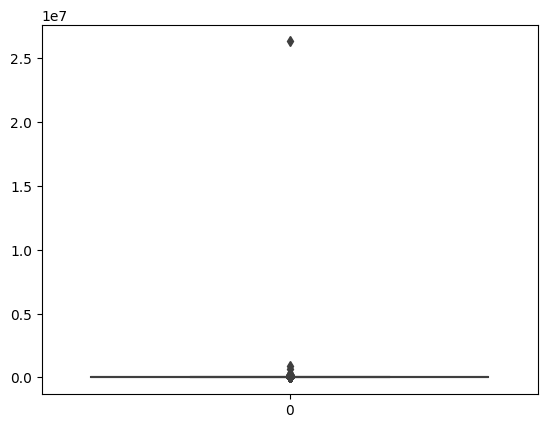

In [1697]:
sns.boxplot(cleaned_df["Price"])

# Quantiles of price in the dataset
my_quantiles(cleaned_df, "Price")


I would like to try to remove the farthest outlier and have a closer look at the distribution of the target.

In [1698]:
# Number of outliers
def outlier_handle(cleaned_df, col):
    
    quantiles = cleaned_df[col].quantile([0.25, 0.75])
    outlier_high = quantiles.iloc[1] + 3 * (quantiles.iloc[1] - quantiles.iloc[0])
    outlier_low = quantiles.iloc[0] - 3 * (quantiles.iloc[1] - quantiles.iloc[0])

    print(f"Outliers: {len(cleaned_df[cleaned_df[col] > outlier_high]) + len(cleaned_df[cleaned_df[col] < outlier_low])} outlier(s)")
    print(f"Proportion: {(len(cleaned_df[cleaned_df[col] > outlier_high]) + len(cleaned_df[cleaned_df[col] < outlier_low]))/len(cleaned_df[col])}")
    
    return cleaned_df.loc[((cleaned_df[col] >= outlier_low) & (cleaned_df[col] <= outlier_high)) |  (cleaned_df[col].isna() == True)]



Quantiles:
 0.25     7683.0
0.50    14426.0
0.75    23521.0
Name: Price, dtype: float64

min-max: 549 - 26307500
mean: 20320.955810052634


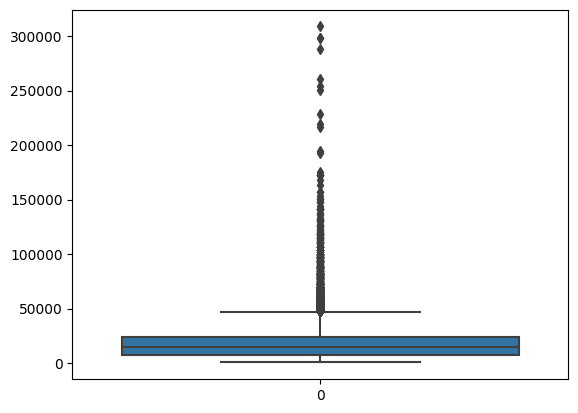

In [1699]:
sns.boxplot(cleaned_df.loc[cleaned_df["Price"] < 600000]["Price"])

# Quantiles of price in the dataset

my_quantiles(cleaned_df, "Price")

Outliers: 315 outlier(s)
Proportion: 0.018219677251431546


<Axes: >

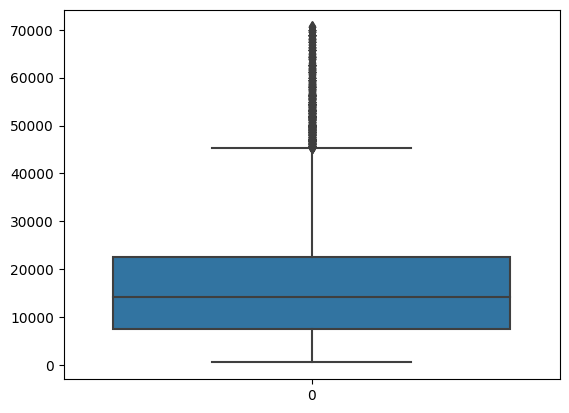

In [1700]:
sns.boxplot(outlier_handle(cleaned_df, "Price")["Price"])

<Axes: xlabel='Price', ylabel='Count'>

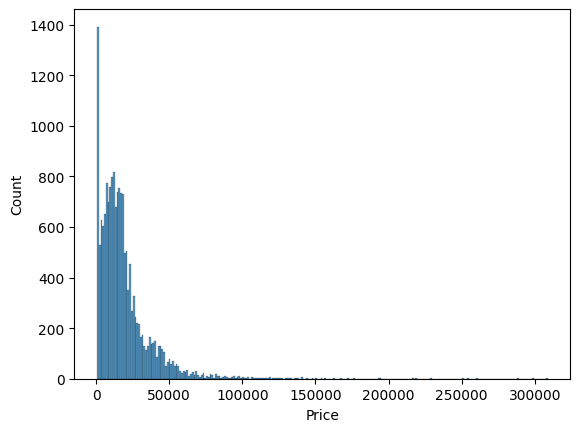

In [1701]:
# Checking the distribution of the target
sns.histplot(cleaned_df.loc[cleaned_df["Price"] < 600000]["Price"])

It is not normally distributed, so we will transform it by log.

/tmp/ipykernel_42/2635392620.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["LogPrice"] = cleaned_df["Price"].apply(lambda x: log(x)).copy()


Outliers: 2 outlier(s)
Proportion: 0.00011568049048527966


[Text(0.5, 1.0, 'After removing outliers')]

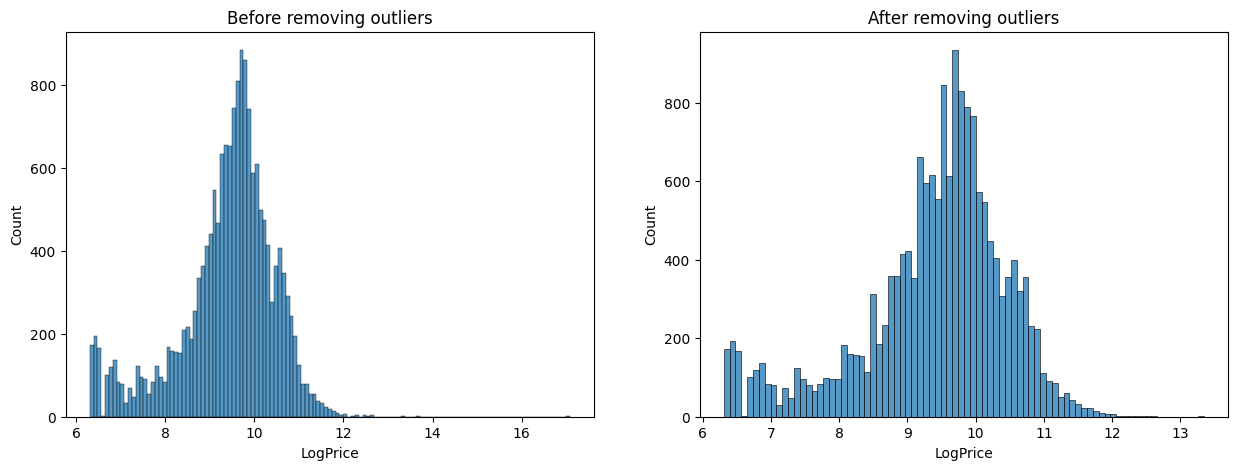

In [1702]:
# Checking the distribution of the target
from math import log  

fig, axs = plt.subplots(1, 2, figsize=(15,5))

cleaned_df["LogPrice"] = cleaned_df["Price"].apply(lambda x: log(x)).copy()
sns.histplot(cleaned_df["LogPrice"], ax=axs[0]).set(title="Before removing outliers")

sns.histplot(outlier_handle(cleaned_df, "LogPrice")["LogPrice"], ax=axs[1]).set(title="After removing outliers")

Outliers: 2 outlier(s)
Proportion: 0.00011568049048527966


<Axes: >

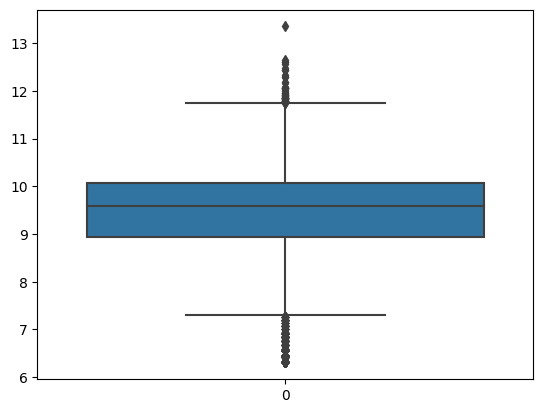

In [1703]:
sns.boxplot(outlier_handle(cleaned_df, "LogPrice")["LogPrice"])

Let's remove some outliers like above.

In [1704]:
cleaned_df = outlier_handle(cleaned_df, "LogPrice")

Outliers: 2 outlier(s)
Proportion: 0.00011568049048527966


## Field Cleaning

### Engine Volume

The feature contains a float and a string describing the type of the engine. Therefore, I will divide the feature into 2 features, one for Engine volumn and one for turbo.

In [1705]:
# Add turbo column
turbo = []

for value in cleaned_df["Engine volume"].values:
    if(len(value.split()) > 1):
        turbo.append(1)
    else:
        turbo.append(0)

cleaned_df["Turbo"] = turbo.copy()

# Change engine volume column
volume = []

for value in cleaned_df["Engine volume"].values.copy():
    volume.append(float(value.split()[0]))

cleaned_df.loc[:,"Engine volume"] = volume

### Mileage

The field describes how many kilometres did a car go for. It is better to convert it into float because kilometer's unit is a number.

In [1706]:
# If there is any consistencies in the unit
units = set([x.split()[1] for x in cleaned_df["Mileage"].values])
print(units)

{'km'}


In [1707]:
cleaned_df.loc[:, "Mileage"] = [float(x.split()[0]) for x in cleaned_df["Mileage"].values]

### Doors

The format is wrong. It is currently in form of a date instead of numbers. Therefore, I will change it to string for meaning purpose.

In [1708]:
doors = []

for value in cleaned_df["Doors"].values:
    if(value == "02-Mar"):
        doors.append("2-3")
    elif(value == "04-May"):
        doors.append("4-5")
    else:
        doors.append("5")
        
cleaned_df["Doors"] = doors.copy()

### Drive Wheel

Similarly, I will change "4x4" to "Four" for the meaning purpose.

In [1709]:
engine = []

for value in cleaned_df["Drive wheels"]:
    if(value == "4x4"):
        engine.append("Four")
    else:
        engine.append(value)
        
cleaned_df["Drive wheels"] = engine.copy()

### Levy
As it can be seen, there are missing values in 'Levy' in the form of '-', furthermore, all other values are integer. Therefore, I will handle the missing values and convert the type of the column to int64.

There are a lot of missing values which occupy about 33% of the whole dataset.

In [1710]:
# Number of missing values
cleaned_df = cleaned_df.replace("-", np.nan)
cleaned_df["Levy"] = cleaned_df["Levy"].astype('float64')

cleaned_df["Levy"].isna().sum()/len(cleaned_df)

0.30913403135303985

In [1711]:
df_missing_levy = cleaned_df.loc[cleaned_df["Levy"].isna() == True]
df_missing_levy

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,LogPrice,Turbo
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4-5,Right-hand drive,Black,2,9.043932,0
9,26657,NaN,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500.0,6.0,Automatic,Four,4-5,Left wheel,Silver,12,10.190807,0
11,8781,NaN,FORD,Transit,1999,Microbus,No,CNG,4.0,0.0,8.0,Manual,Rear,2-3,Left wheel,Blue,0,9.080346,0
12,3000,NaN,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000.0,4.0,Manual,Front,4-5,Left wheel,White,4,8.006368,0
23,7840,NaN,FORD,Transit,2001,Microbus,No,Diesel,2.0,230000.0,4.0,Manual,Front,2-3,Left wheel,White,0,8.966994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19221,15681,NaN,VOLKSWAGEN,Jetta,2013,Sedan,Yes,Petrol,2.5,81200.0,5.0,Manual,Front,4-5,Left wheel,Silver,12,9.660205,0
19223,8781,NaN,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0.0,4.0,Automatic,Front,4-5,Left wheel,Blue,4,9.080346,0
19224,19130,NaN,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800.0,4.0,Automatic,Front,4-5,Left wheel,Black,12,9.859013,0
19226,7840,NaN,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3.0,220000.0,6.0,Tiptronic,Rear,4-5,Right-hand drive,White,0,8.966994,0


Let's explore the missing values.

> The statistics of price of data points that have missing levy are approximately equal to the mean of the whole dataset. The price is not the reason why levy is missing. For other reasons, we might figure out while exploring other features later.


In [1712]:
# Quantiles of price in missing-levy dataset

my_quantiles(df_missing_levy, "Price")

Quantiles:
 0.25     7840.0
0.50    13172.0
0.75    20385.0
Name: Price, dtype: float64

min-max: 600 - 627220
mean: 18047.65494011976


 
There is a clear outlier in the levy attribute. For fitting linear regression model, I would like to remove the outlier.

[Text(0.5, 1.0, 'Box plot of levy values')]

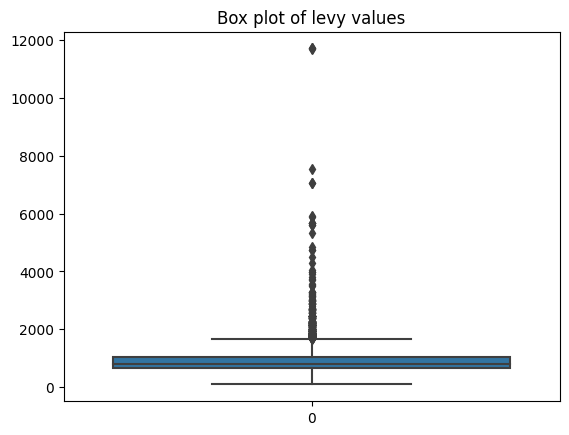

In [1713]:
sns.boxplot(cleaned_df["Levy"]).set(title="Box plot of levy values")

Outliers: 117 outlier(s)
Proportion: 0.006768091629548215
Outliers: 117 outlier(s)
Proportion: 0.006768091629548215
Quantiles:
 0.25     640.0
0.50     780.0
0.75    1053.0
Name: Levy, dtype: float64

min-max: 87.0 - 2297.0
mean: 873.588618298664


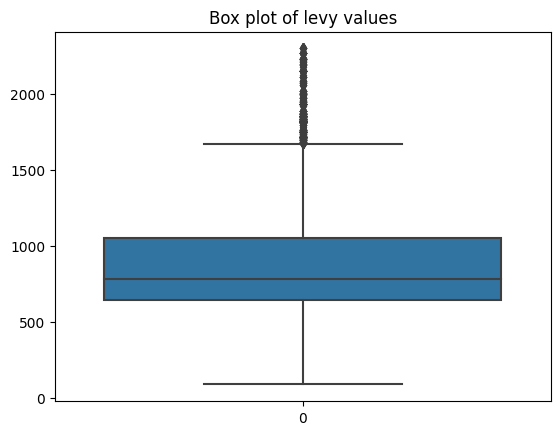

In [1714]:
sns.boxplot(outlier_handle(cleaned_df, "Levy")["Levy"]).set(title="Box plot of levy values")
my_quantiles(outlier_handle(cleaned_df, "Levy"), "Levy")

In [1715]:
cleaned_df = cleaned_df[(cleaned_df["Levy"] < 6000) | (cleaned_df["Levy"].isna() == True)]

In [1716]:
no_missing_levy = cleaned_df.loc[df["Levy"].isna() == False]

my_quantiles(no_missing_levy, "Levy")

Quantiles:
 0.25     640.0
0.50     781.0
0.75    1055.0
Name: Levy, dtype: float64

min-max: 87.0 - 5908.0
mean: 894.1599229287091


[Text(0.5, 1.0, 'Box plot of levy values')]

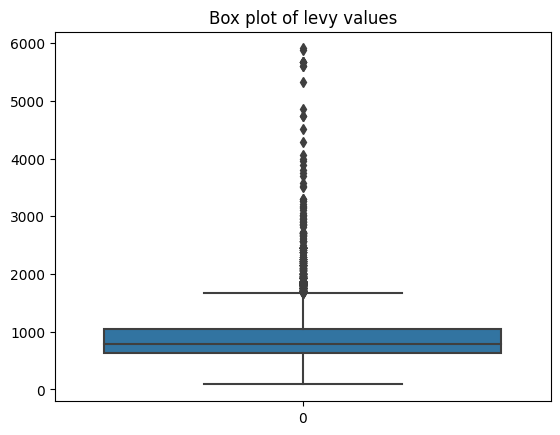

In [1717]:
sns.boxplot(cleaned_df["Levy"]).set(title="Box plot of levy values")

Hence, I will impute the missing values by several methods:

**1. the median due to outliers**

0


[Text(0.5, 1.0, 'Box plot of levy values')]

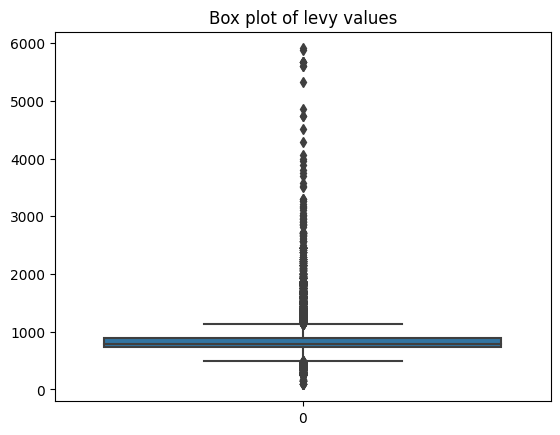

In [1718]:
test_cleaned_df = cleaned_df.copy().fillna(no_missing_levy["Levy"].median())

print(test_cleaned_df["Levy"].isna().sum())
sns.boxplot(test_cleaned_df["Levy"]).set(title="Box plot of levy values")

In [1719]:
print(f"Quantiles:\n {test_cleaned_df['Levy'].quantile([0.25, 0.5, 0.75])}\n")
print(f"min-max: {test_cleaned_df['Levy'].min()} - {test_cleaned_df['Levy'].max()}")
print(f"mean: {test_cleaned_df['Levy'].mean()}")

Quantiles:
 0.25    730.0
0.50    781.0
0.75    891.0
Name: Levy, dtype: float64

min-max: 87.0 - 5908.0
mean: 859.1661940859904


**2. Forward values to maintain the randomness of the variable**

0


[Text(0.5, 1.0, 'Box plot of levy values')]

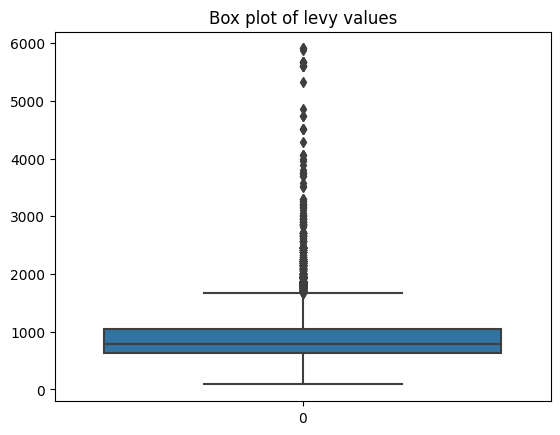

In [1720]:
test_cleaned_df2 = cleaned_df.copy().fillna(method="ffill", axis=0)

print(test_cleaned_df2["Levy"].isna().sum())
sns.boxplot(test_cleaned_df2["Levy"]).set(title="Box plot of levy values")

In [1721]:
print(f"Quantiles:\n {test_cleaned_df2['Levy'].quantile([0.25, 0.5, 0.75])}\n")
print(f"min-max: {test_cleaned_df2['Levy'].min()} - {test_cleaned_df2['Levy'].max()}")
print(f"mean: {test_cleaned_df2['Levy'].mean()}")

Quantiles:
 0.25     640.0
0.50     781.0
0.75    1055.0
Name: Levy, dtype: float64

min-max: 87.0 - 5908.0
mean: 893.0359354204039


As it can be seen, filling Nan by the forward values maintains better the distribution of 'Levy'.

**3. Remove all missing values**

0


[Text(0.5, 1.0, 'Box plot of levy values')]

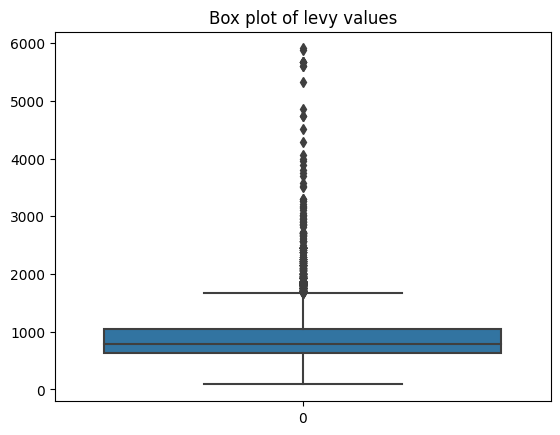

In [1722]:
test_cleaned_df3 = cleaned_df.copy().dropna(inplace=False) # Only 'Levy' contains NaN

print(test_cleaned_df3["Levy"].isna().sum())
sns.boxplot(test_cleaned_df3["Levy"]).set(title="Box plot of levy values")

I will return to this feature later when training the model.

### Continuous and Ordinal Variables

In [1723]:
# Get the name of the columns
or_cont_cols =[]

for col in cleaned_df.columns:
    if cleaned_df[col].dtype != "object" and col != "Price" and col != "Turbo" and col != "LogPrice":
        or_cont_cols.append(col)

ordinal_cols = ["Prod. year", "Cylinders", "Airbags"]
cont_cols = [x for x in or_cont_cols if x not in ordinal_cols]
or_cont_cols

['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']

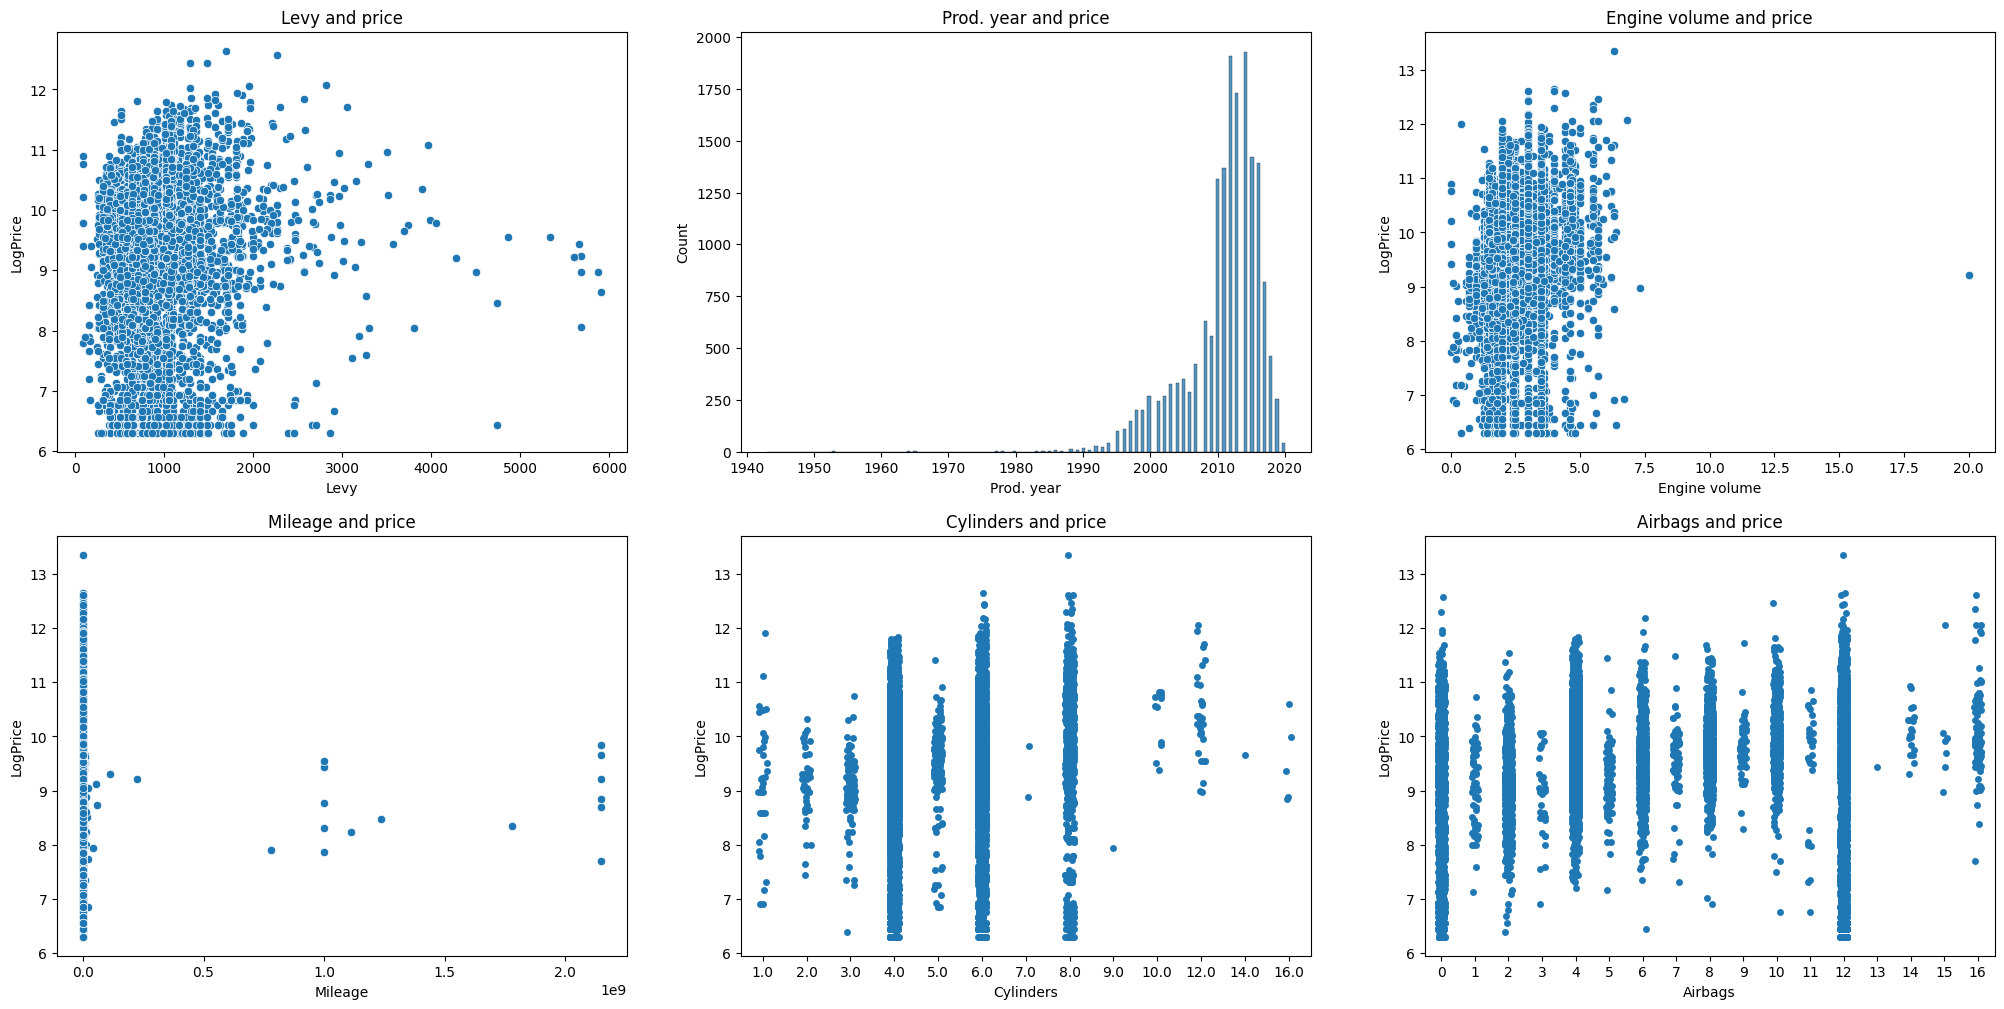

In [1724]:
fig, axs = plt.subplots(2, 3, figsize=(25,12))
axs = axs.flatten()

i = 0

for col in or_cont_cols:
    if col in cont_cols:
        sns.scatterplot(cleaned_df, x=col, y ="LogPrice", ax=axs[i]).set(title=f"{col} and price")
    elif col == "Prod. year":
        sns.histplot(cleaned_df[col], ax=axs[i]).set(title=f"{col} and price")
    else:
        sns.stripplot(cleaned_df, x=col, y ="LogPrice", ax=axs[i]).set(title=f"{col} and price")
                                                 
    i += 1                        


### Mileage
There are only a few cars that have been traveled for more than  1e6 kilometres. 

In [1725]:
 print(f"Number of instances with Mileage <= 10^1: {len(cleaned_df['Mileage'][cleaned_df['Mileage'] <= math.pow(10, 1)])}")

for i in range(1, 10):
    print(f"Number of instances with Mileage > 10^{i}: {len(cleaned_df['Mileage'][cleaned_df['Mileage'] > math.pow(10, i)])}")
    
print(f"Number of instances with Mileage = 0: {len(cleaned_df['Mileage'][cleaned_df['Mileage'] == 0])}")

Number of instances with Mileage <= 10^1: 591
Number of instances with Mileage > 10^1: 16690
Number of instances with Mileage > 10^2: 16687
Number of instances with Mileage > 10^3: 16576
Number of instances with Mileage > 10^4: 16250
Number of instances with Mileage > 10^5: 10748
Number of instances with Mileage > 10^6: 69
Number of instances with Mileage > 10^7: 28
Number of instances with Mileage > 10^8: 17
Number of instances with Mileage > 10^9: 9
Number of instances with Mileage = 0: 591


Outliers: 215 outlier(s)
Proportion: 0.012441409640645796


[Text(0.5, 1.0, 'Mileage Distribution after')]

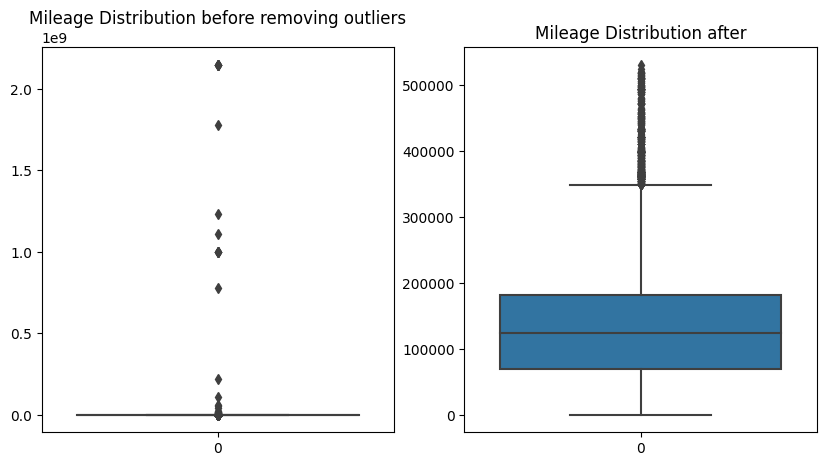

In [1726]:
fix, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(cleaned_df["Mileage"], ax=axs[0]).set(title=f"Mileage Distribution before removing outliers")
sns.boxplot(outlier_handle(cleaned_df, "Mileage")["Mileage"], ax=axs[1]).set(title=f"Mileage Distribution after")

Outliers: 215 outlier(s)
Proportion: 0.012441409640645796


[Text(0.5, 1.0, 'Mileage and price after')]

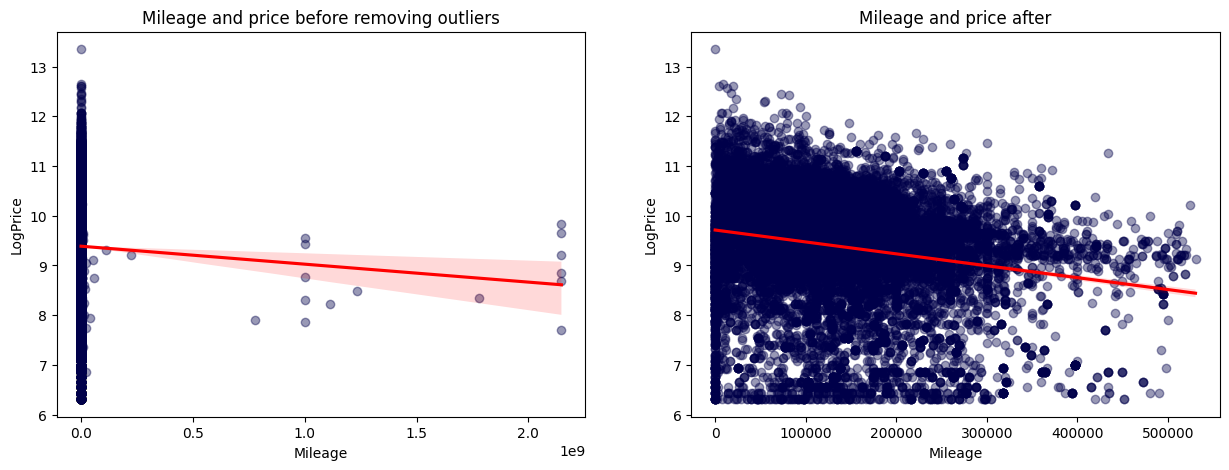

In [1727]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
sns.regplot(cleaned_df, x="Mileage", y ="LogPrice", scatter_kws={"color": "#00004A", "alpha": 0.4}, line_kws={"color": "red"}, ax=axs[0]).set(title=f"Mileage and price before removing outliers")
sns.regplot(outlier_handle(cleaned_df, "Mileage"), x="Mileage", y ="LogPrice", scatter_kws={"color": "#00004A", "alpha": 0.4}, line_kws={"color": "red"}, ax=axs[1]).set(title=f"Mileage and price after")

In [1728]:
cleaned_df = outlier_handle(cleaned_df, "Mileage")

Outliers: 215 outlier(s)
Proportion: 0.012441409640645796


### Product Year
> Product Year does not seem to be a linear relationship with Price.

> Before 1990, the price of cars fluctuated significantly.

<Axes: xlabel='Prod. year', ylabel='Count'>

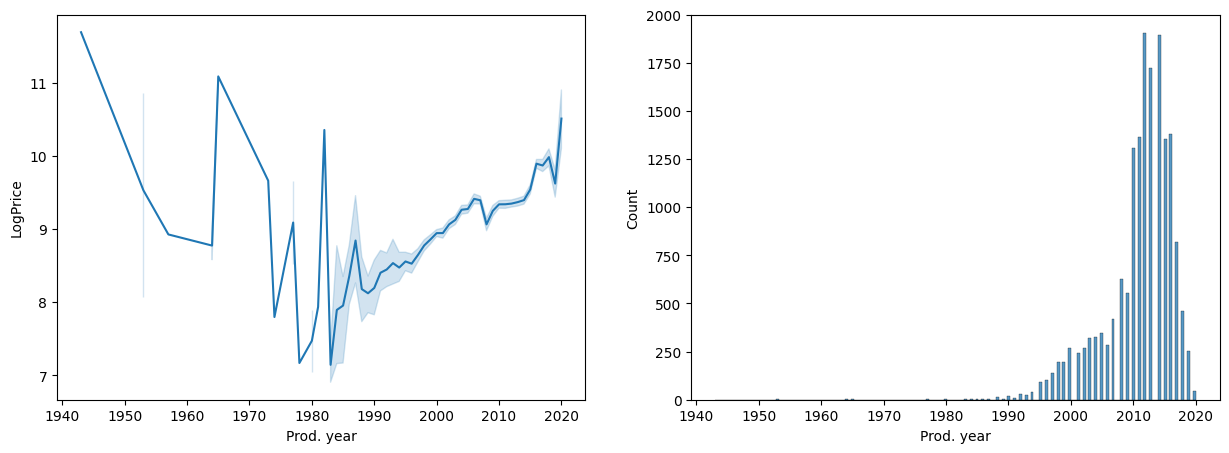

In [1729]:
fig,axs = plt.subplots(1, 2, figsize=(15,5))
sns.lineplot(cleaned_df, x="Prod. year", y="LogPrice", ax=axs[0])
sns.histplot(cleaned_df, x="Prod. year", ax=axs[1])

Outliers: 76 outlier(s)
Proportion: 0.004453298956990507
Outliers: 76 outlier(s)
Proportion: 0.004453298956990507


<Axes: xlabel='Prod. year', ylabel='Count'>

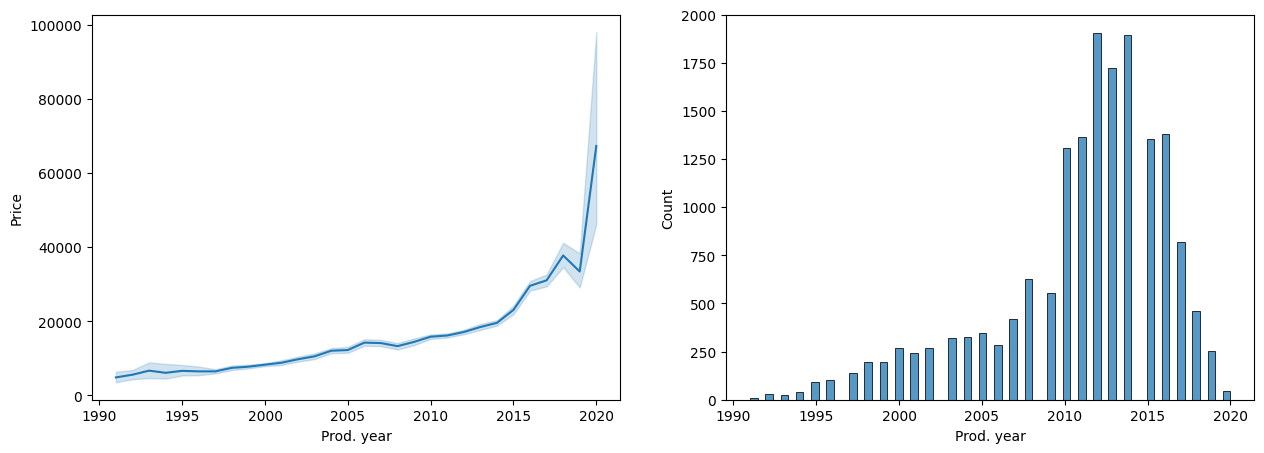

In [1730]:
# Remove outlier

fig,axs = plt.subplots(1, 2, figsize=(15,5))
sns.lineplot(outlier_handle(cleaned_df, "Prod. year"), x="Prod. year", y="Price", ax=axs[0])
sns.histplot(outlier_handle(cleaned_df, "Prod. year"), x="Prod. year", ax=axs[1])

That removes too much values, therefore, I will categorise it instead.

<Axes: xlabel='binned_year', ylabel='Count'>

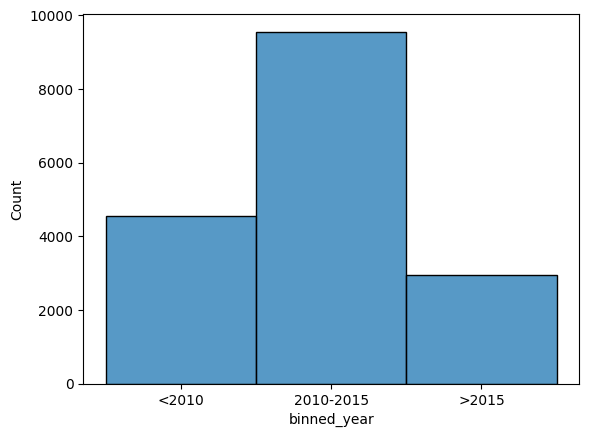

In [1731]:
out = []

for year in cleaned_df["Prod. year"]:
    if year < 2010:
        out.append("<2010")
    elif year <= 2015:
        out.append("2010-2015")
    else:
        out.append(">2015")
    
cleaned_df["binned_year"] = out

# custom dict for sorting based on year periods
custom_dict = {"<2010": 0, "2010-2015": 1, "2015": 2}

sns.histplot(cleaned_df["binned_year"].copy().sort_values(key=lambda x: x.map(custom_dict)))

Surprisingly, there are a lot of columns with NaN Levy for cars manifactured before 2010. One example of explanation is that at that time, car tax policy was not strictly applied as the current time. This could mean that NaN value in Levy might be related to the Prod. year. 

In [1732]:
strange_year = cleaned_df["Prod. year"].loc[cleaned_df["Prod. year"] < 2010]
df_syear = cleaned_df[cleaned_df["Prod. year"].isin(strange_year.values)]

df_syear["Levy"].isna().sum()/cleaned_df["Levy"].isna().sum()

0.6644486692015209

### Engine Volume

[Text(0.5, 1.0, 'Mileage and price')]

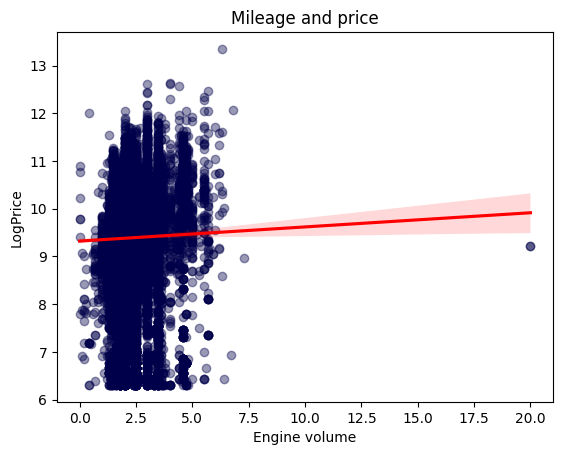

In [1733]:
sns.regplot(cleaned_df, x="Engine volume", y ="LogPrice", scatter_kws={"color": "#00004A", "alpha": 0.4}, line_kws={"color": "red"}).set(title=f"Mileage and price")

Outliers: 341 outlier(s)
Proportion: 0.019981249267549513


[Text(0.5, 1.0, 'Engine volume and price')]

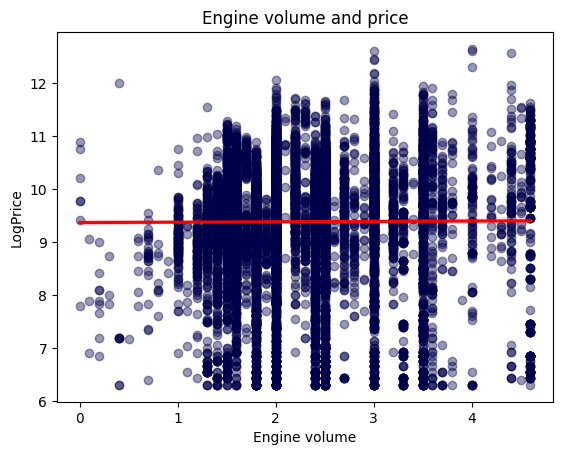

In [1734]:
# Plot after removing outliers
sns.regplot(outlier_handle(cleaned_df, "Engine volume"), x="Engine volume", y ="LogPrice", scatter_kws={"color": "#00004A", "alpha": 0.4}, line_kws={"color": "red"}).set(title=f"Engine volume and price")

That is too many outliers removed, therefore, I will just remove the farthest outlier.

In [1735]:
cleaned_df = cleaned_df[cleaned_df["Engine volume"] < 10]

# Exploratory Data Analysis

### Nominal fields that have only a few values and might be imbalanced - Price

In [1736]:
# Find all fields that have less than 5 possible values
short_cols = []

for col in cleaned_df.columns:
    if len(cleaned_df[col].value_counts()) < 5 and col not in or_cont_cols:
        short_cols.append(col)
        
short_cols.remove("binned_year")
short_cols

['Leather interior',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Turbo']

> From the below figures, 'Leather interior', 'Gear box type', 'Wheel' and 'Turbo' might have a strong impact on the target because of the different distributions between each value.

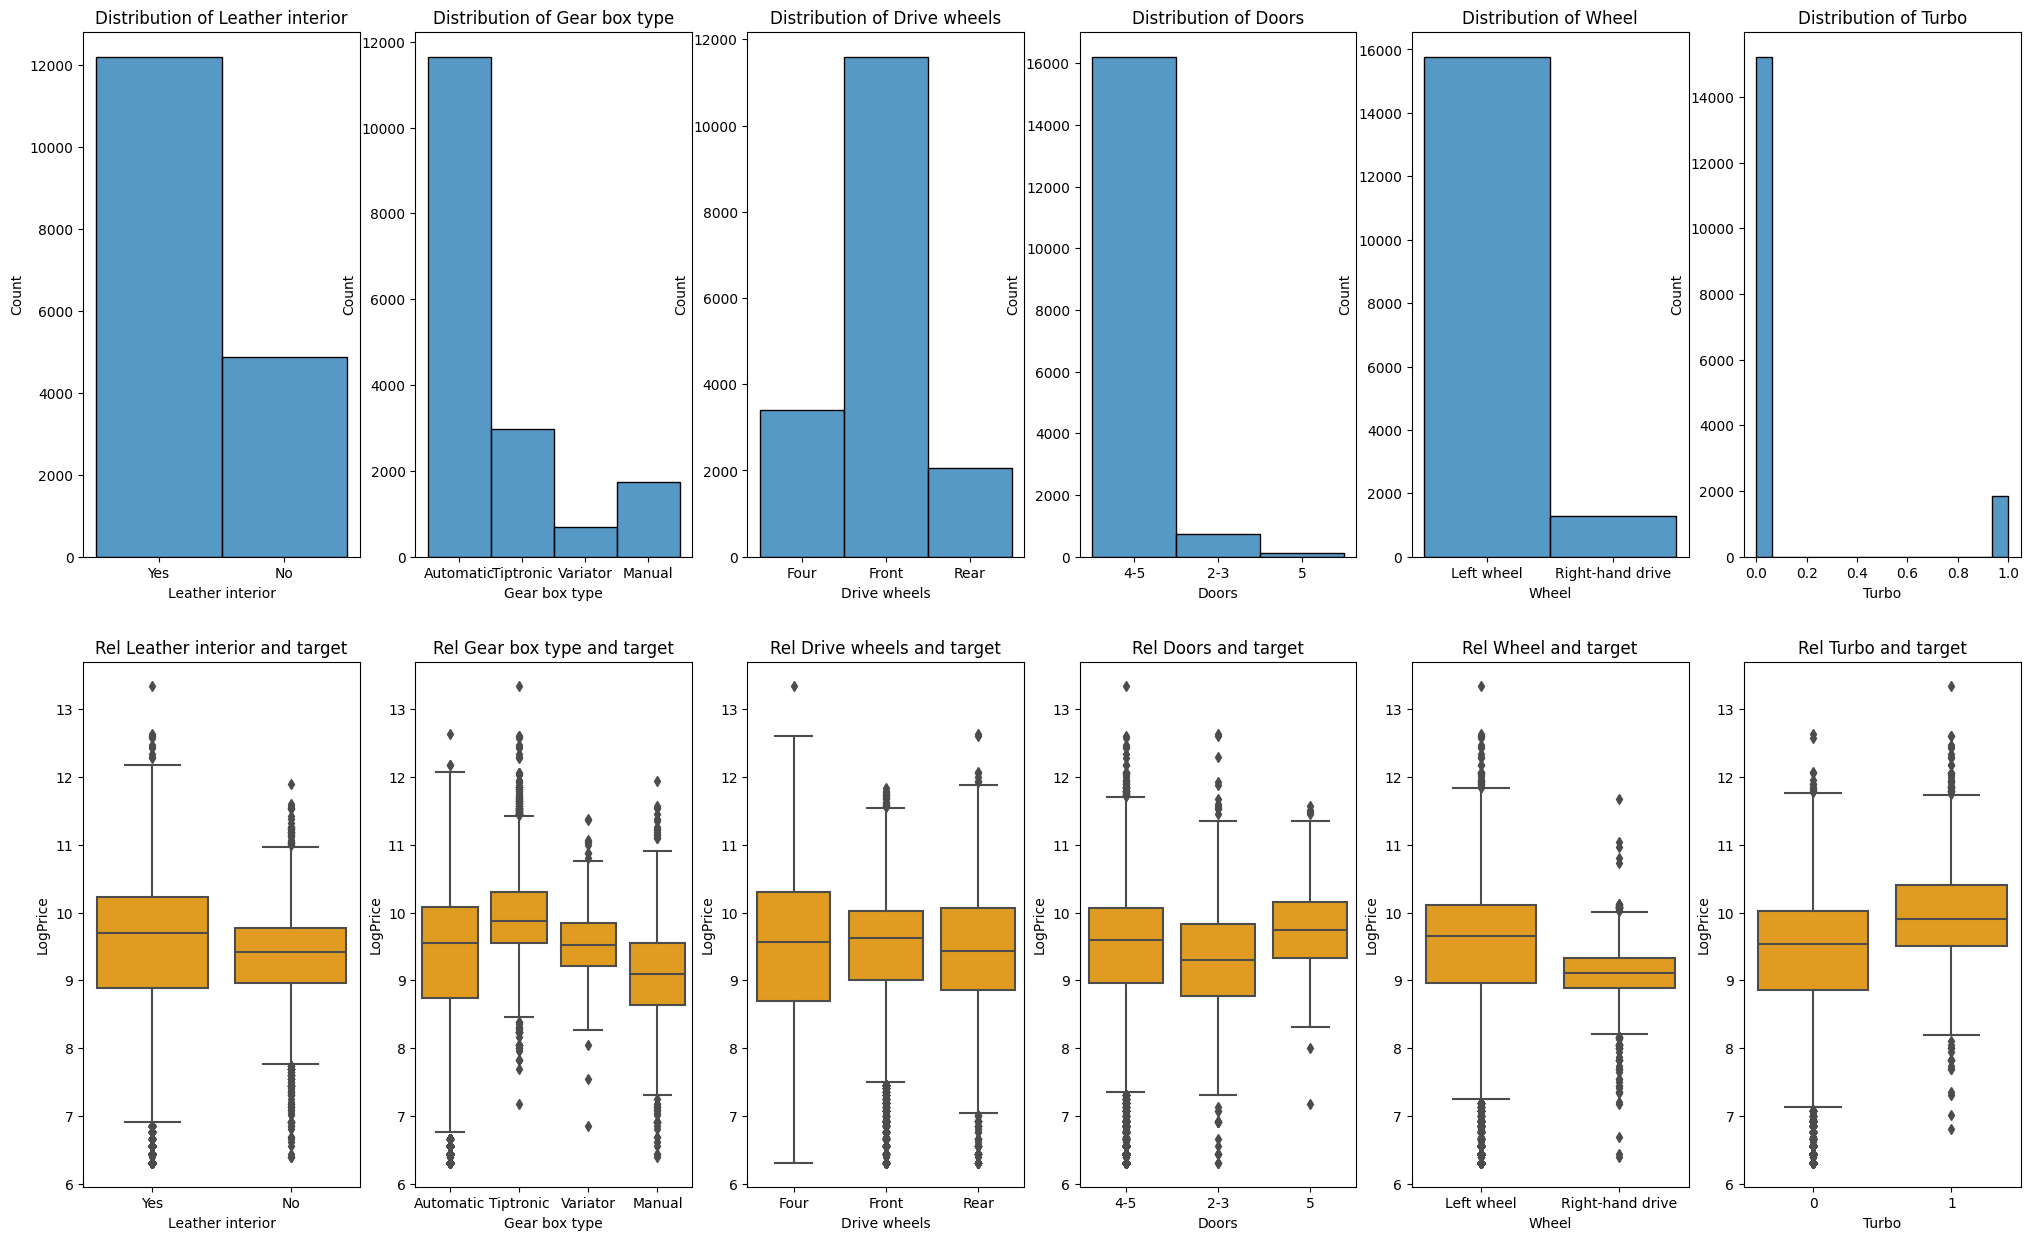

In [1737]:
fig, axs = plt.subplots(2, 6, figsize=(25,15))

# Distribution plot
i = 0
for col in short_cols:
    ax = sns.histplot(cleaned_df[col], ax=axs[0][i]).set(title=f"Distribution of {col}")
    i += 1

# Relationship plot, removing outlier for clearer visualisation
i = 0
for col in short_cols:
    sns.boxplot(cleaned_df, x=col, y="LogPrice", color="orange", ax=axs[1][i]).set(title=f"Rel {col} and target")
    i += 1

### Category

There are 11 distinct values for the category feature. There is no large but small differences of the car's price between each category.

The most frequent categories are Jeep, Sedan, Hatchback.

In [1738]:
cleaned_df["Category"].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

<Axes: xlabel='Category', ylabel='Count'>

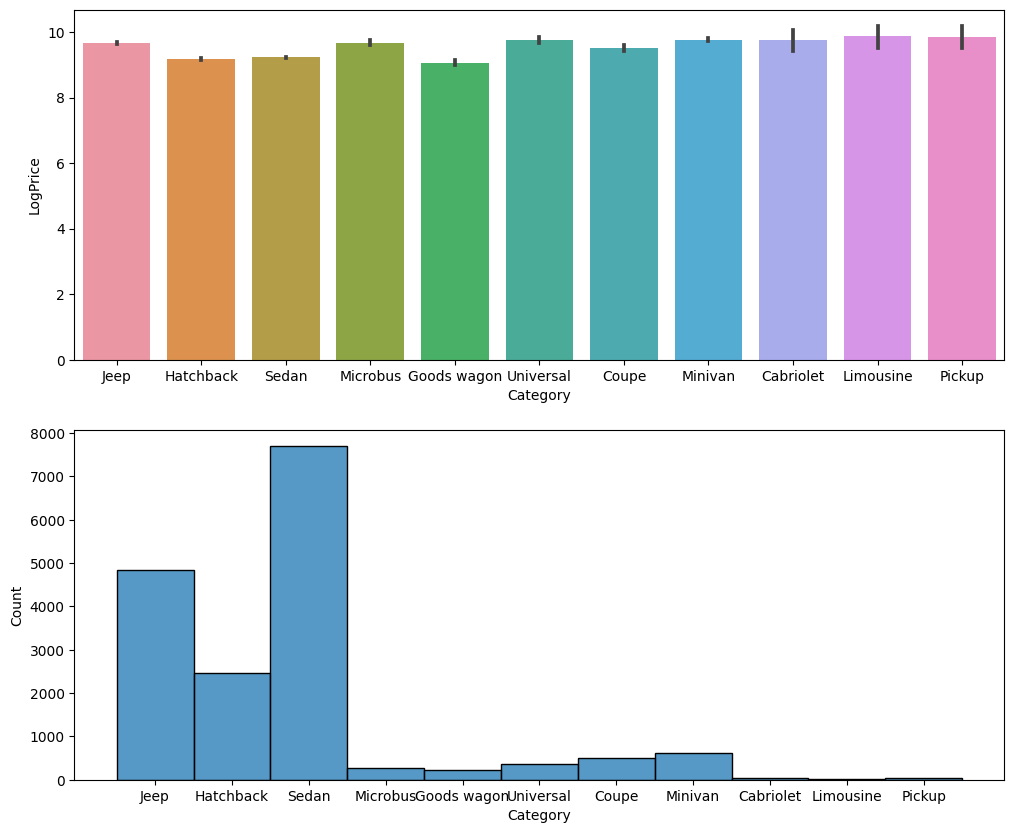

In [1739]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
sns.barplot(cleaned_df, x="Category", y="LogPrice", ax=axs[0])
sns.histplot(cleaned_df["Category"], ax=axs[1])

### Fuel types
* Hybrid, Petrol and Diesel are the three most popular fuel types.
* Cars with Diesel, Plug-in Hybrid and Hydrogen have a higher price.
* Cars with CNG and LPG have a lower price.

<Axes: xlabel='Fuel type', ylabel='Count'>

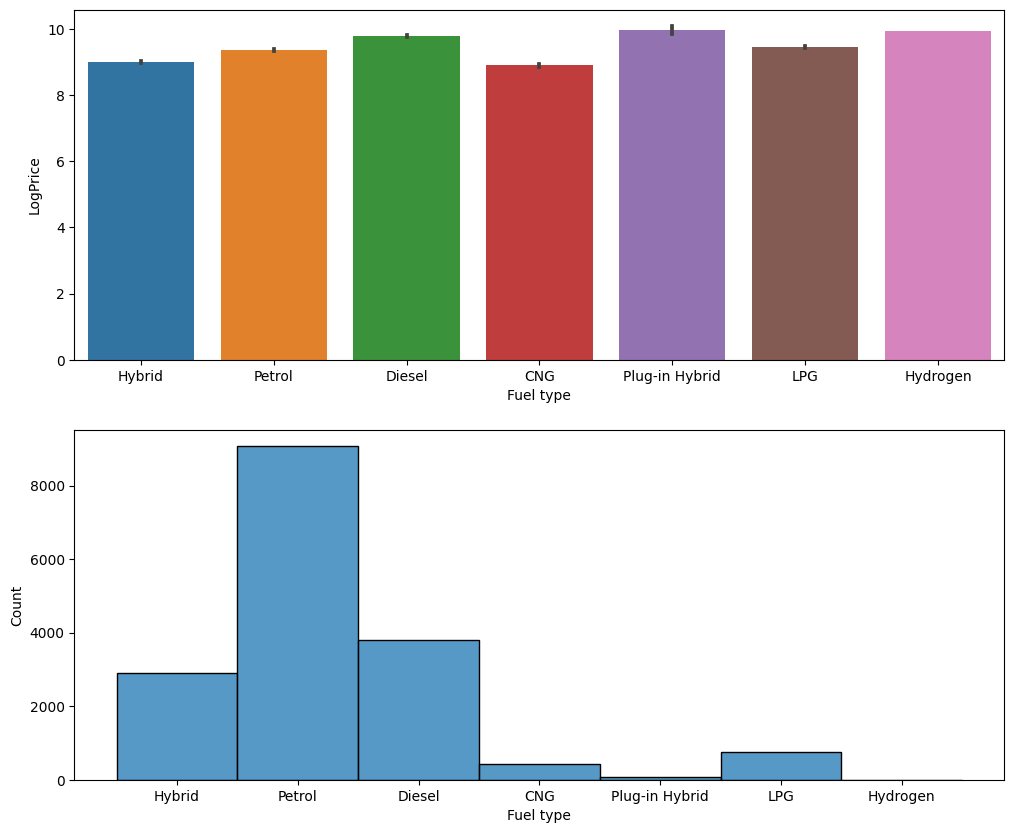

In [1742]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
sns.barplot(cleaned_df, x="Fuel type", y="LogPrice", ax=axs[0])
sns.histplot(cleaned_df["Fuel type"], ax=axs[1])

### Colour
* Color might not significantly affect the LogPrice.
* Most common colors are Sliver, Black and White.

<Axes: xlabel='Color', ylabel='Count'>

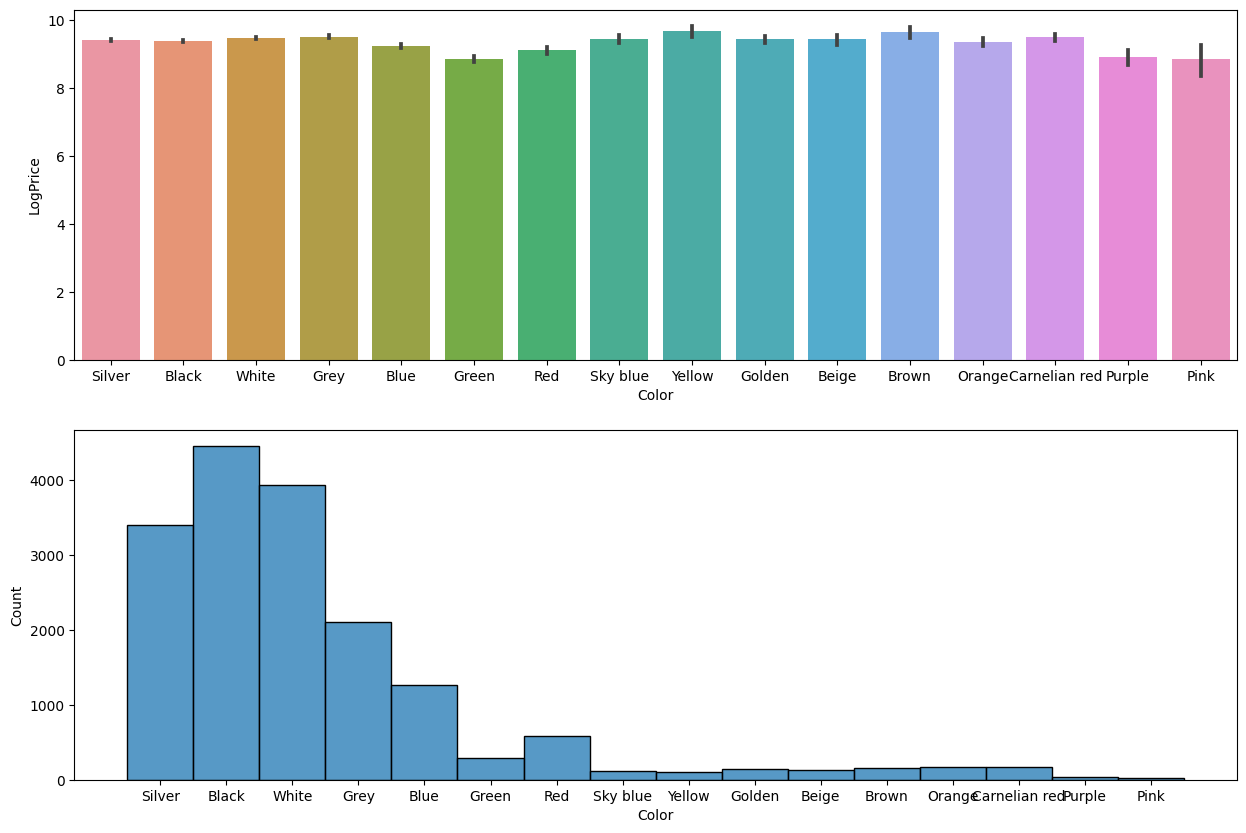

In [1743]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
sns.barplot(cleaned_df, x="Color", y="LogPrice", ax=axs[0])
sns.histplot(cleaned_df["Color"], ax=axs[1])

### Model and Manufacturer

As there are many values and a lot of repetitions, we will convert those values to their frequency.

1. Model

In [1744]:
cleaned_df["Model"].value_counts()

Model
Prius                     894
Sonata                    876
Elantra                   866
Camry                     782
Santa FE                  522
                         ... 
1500,1600 Schtufenheck      1
E 420                       1
C 250 luxury                1
Passat sport                1
Optima ex                   1
Name: count, Length: 1557, dtype: int64

2. Manufacturer


<Axes: xlabel='Count', ylabel='Manufacturer'>

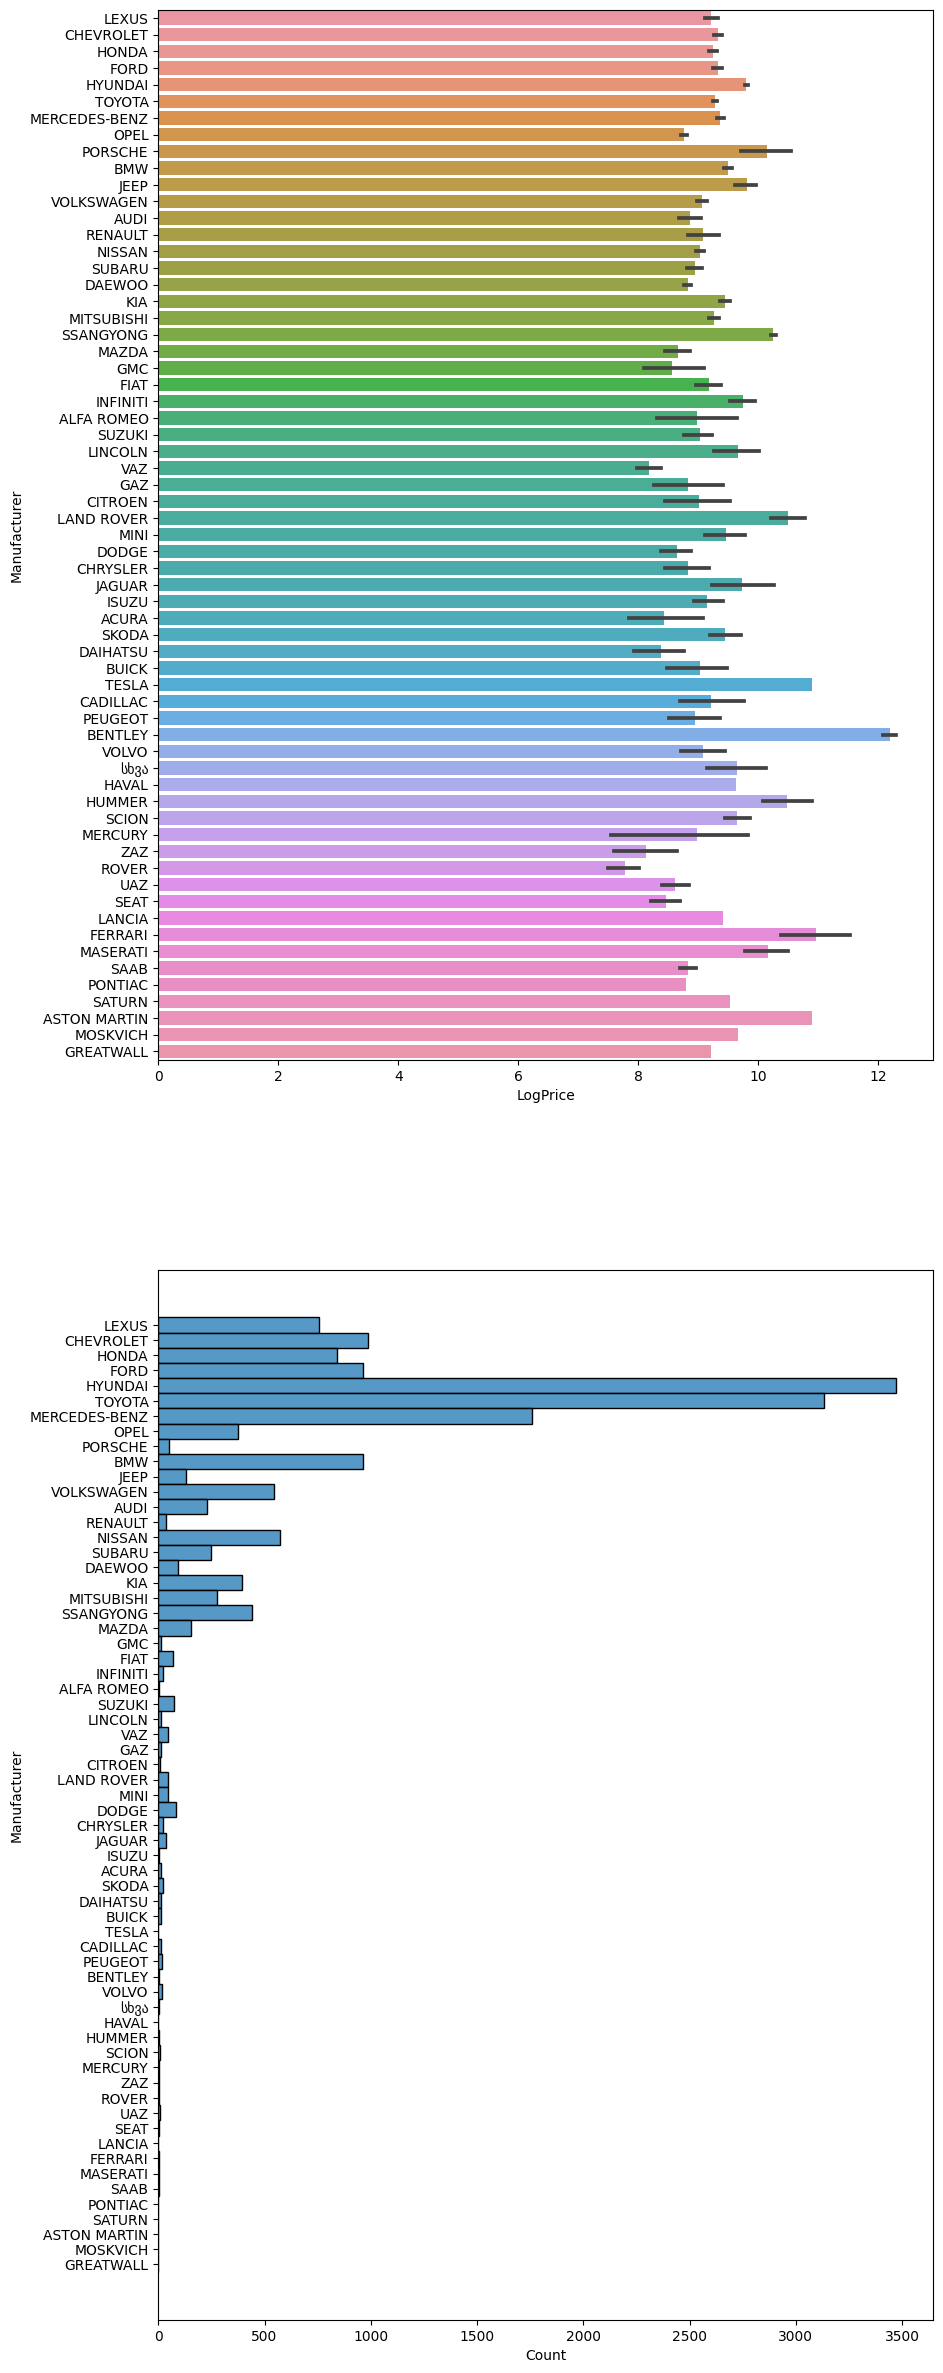

In [1745]:
fig, axs = plt.subplots(2, 1, figsize=(10, 30))
sns.barplot(cleaned_df, x="LogPrice", y="Manufacturer", ax=axs[0])
sns.histplot(y=cleaned_df["Manufacturer"], ax=axs[1])

### Continuous and Ordinal Variables - Price

From the figure explored before, we have some insights:

1. There are just few cars produced before 2005.
2. Most cars have a engine volumn from 1 to 3.5.
3. Most cars are new.


### Binned_year - Price

Text(0.5, 1.0, 'The number of average price for each time period')

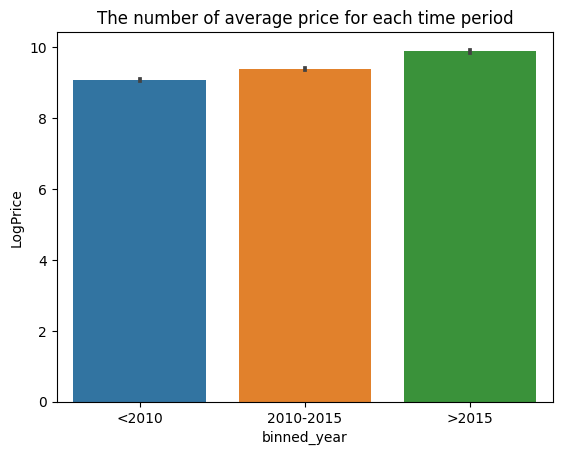

In [1746]:
# custom dict for sorting based on year periods
custom_dict = {"<2010": 0, "2010-2015": 1, "2015": 2}

sns.barplot(cleaned_df.copy().sort_values("binned_year", key=lambda x: x.map(custom_dict)), x="binned_year", y="LogPrice")
plt.title("The number of average price for each time period")

### Mileage - Price

> 'Mileage' might have some relationship with Price as the more a car has been used, the lower the price is.

[Text(0.5, 1.0, 'Mileage and price')]

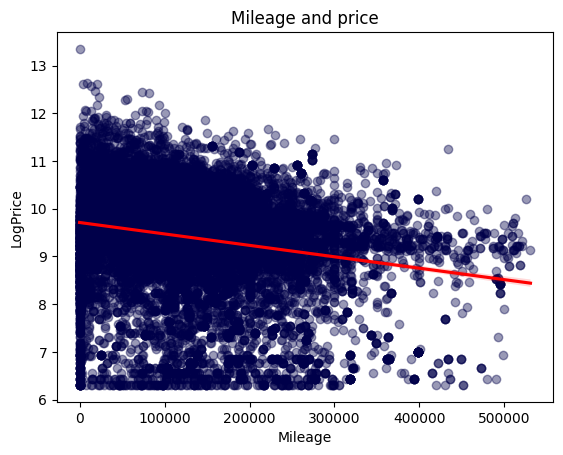

In [1747]:
sns.regplot(cleaned_df, x="Mileage", y ="LogPrice", scatter_kws={"color": "#00004A", "alpha": 0.4}, line_kws={"color": "red"}).set(title=f"Mileage and price")

### Airbags and Cylinders

Applying the same technique as above, we achieved:
* Most cars have 4, 8, 12 airbags.
* Most cars have 4, 6, 8 Cylinders.


> They do not have linear relationship with LogPrice.

<Axes: xlabel='Cylinders', ylabel='Count'>

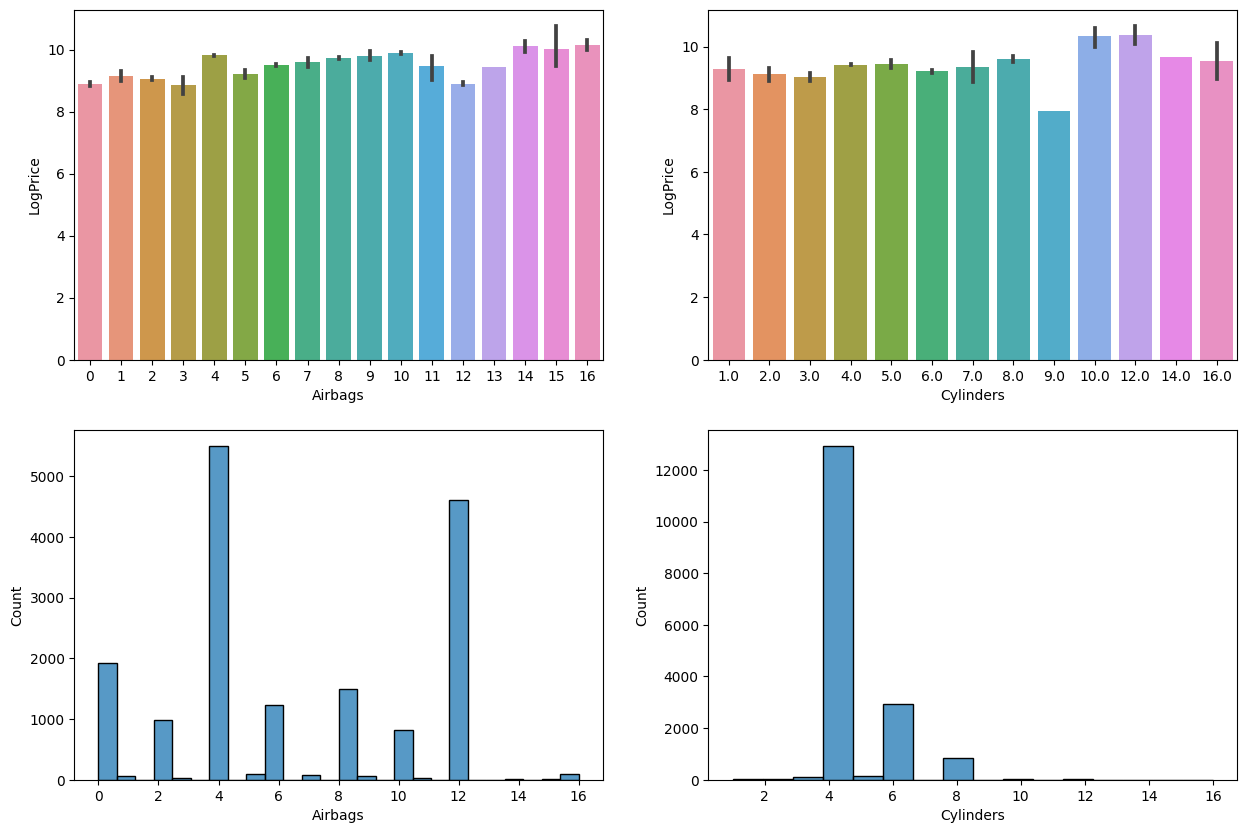

In [1748]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs = axs.flatten()

ax1 = sns.barplot(x='Airbags', y='LogPrice', data=cleaned_df, ax=axs[0])
ax1.set_xlabel('Airbags')

ax2 = sns.barplot(x='Cylinders', y='LogPrice', data=cleaned_df, ax=axs[1])
ax2.set_xlabel('Cylinders')

sns.histplot(data=cleaned_df["Airbags"], ax=axs[2])

sns.histplot(data=cleaned_df["Cylinders"], ax=axs[3])

It seems removing outliers brings no benefits in this case.

Outliers: 0 outlier(s)
Proportion: 0.0
Outliers: 4154 outlier(s)
Proportion: 0.2434364744491327


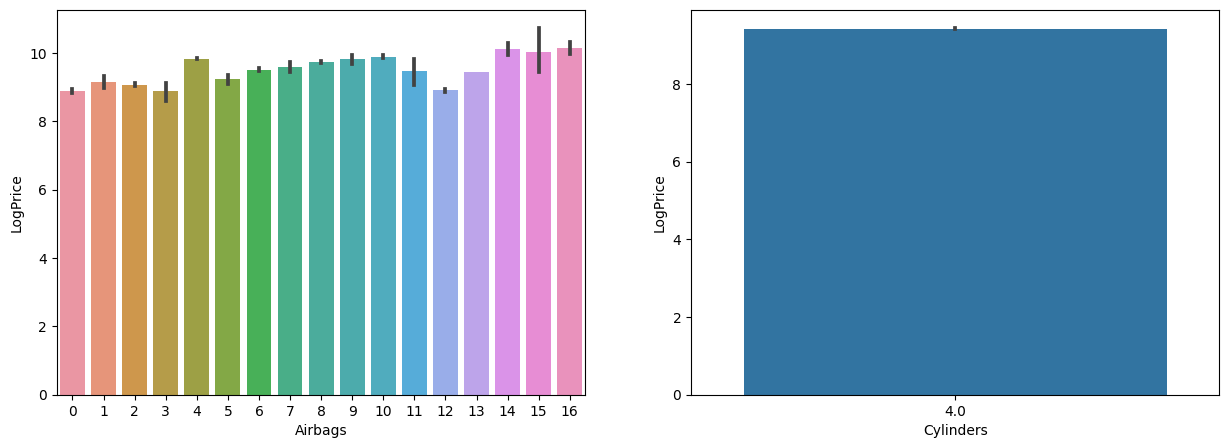

In [1749]:
# Try to remove outliers
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs = axs.flatten()

ax1 = sns.barplot(x='Airbags', y='LogPrice', data=outlier_handle(cleaned_df, "Airbags"), ax=axs[0])
ax2 = sns.barplot(x='Cylinders', y='LogPrice', data=outlier_handle(cleaned_df, "Cylinders"), ax=axs[1])


Binning features will reduce the imbalance of the data.

In [1750]:
# Bin Airbags
out = []

for vol in cleaned_df["Airbags"]:
    if vol <= 4:
        out.append("<5")
    elif vol <= 11:
        out.append("5-11")
    else:
        out.append(">11")
    
cleaned_df["binned_Airbags"] = out.copy()

In [1751]:
# Bin Cylinders
out = []

for vol in cleaned_df["Cylinders"]:
    if vol <= 4:
        out.append("<5")
    elif vol <= 7:
        out.append("5-7")
    else:
        out.append(">=8")
    
cleaned_df["binned_Cylinders"] = out.copy()

<Axes: xlabel='binned_Cylinders', ylabel='Count'>

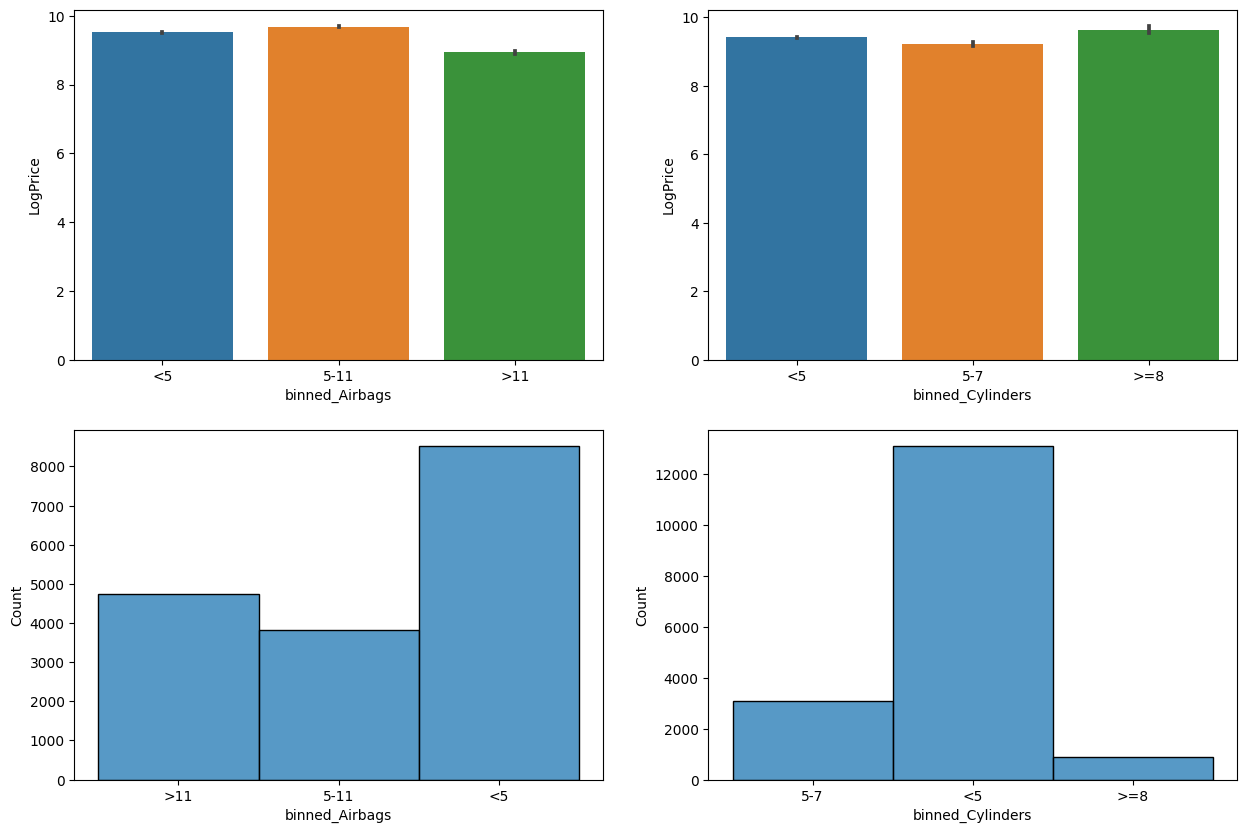

In [1752]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs = axs.flatten()

custom_dict = {"<5": 0, "5-11": 1, ">11": 2}
custom_dict2 = {"<5": 0, "5-7": 1, ">=8": 2}

ax1 = sns.barplot(x='binned_Airbags', y='LogPrice', data=cleaned_df.copy().sort_values("binned_Airbags", key=lambda x: x.map(custom_dict)), ax=axs[0])
ax2 = sns.barplot(x='binned_Cylinders', y='LogPrice', data=cleaned_df.copy().sort_values("binned_Cylinders", key=lambda x: x.map(custom_dict2)), ax=axs[1])

sns.histplot(data=cleaned_df["binned_Airbags"], ax=axs[2])
sns.histplot(data=cleaned_df["binned_Cylinders"], ax=axs[3])

### Levy

Let's explore the missing value again, now we will focus on binned_year patterns. 


After removing outliers of other features, the NaN values associated with binned_year less than 2010 occupies reduces to 30% of all the NaN values.

In [1753]:
miss_levy_year = cleaned_df[cleaned_df["Prod. year"] > 2010]
miss_levy_year["Levy"].isna().sum()/cleaned_df["Levy"].isna().sum()

0.28479087452471485

 > The feature does not seem to have high correlation with Price either.

<Axes: xlabel='Levy', ylabel='Price'>

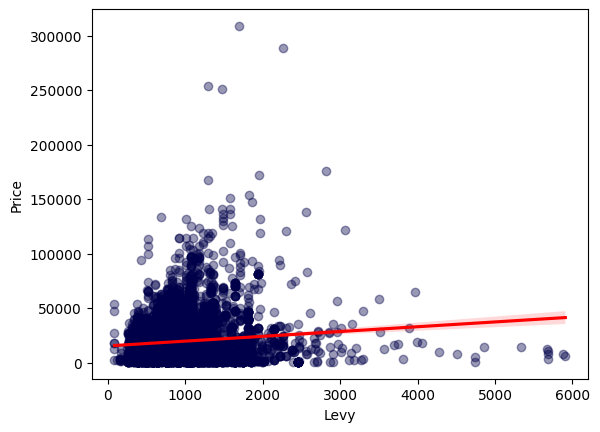

In [1754]:
sns.regplot(cleaned_df, x="Levy", y="Price", scatter_kws={"color": "#00004A", "alpha": 0.4}, line_kws={"color": "red"})

### Correlation between features
* Engine volume and Levy have high correlation.
* Cylinders have high correlation with Levy and Engine volume.

In [1755]:
continuous = ['Levy', 'Engine volume', 'Mileage','Airbags', 'Prod. year', "Cylinders"]

<Axes: >

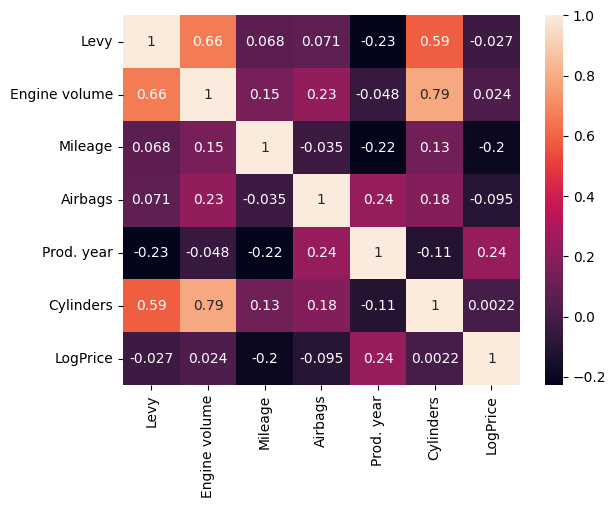

In [1756]:
sns.heatmap(cleaned_df[continuous + ["LogPrice"]].corr(), annot=True) 

# Linear Regression Model

In [1845]:
cleaned_df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'LogPrice', 'Turbo', 'binned_year', 'Category_Order',
       'binned_Airbags', 'binned_Cylinders'],
      dtype='object')

First I will split the data into train-test dataset.

In [1846]:
# Extract features and target
cleaned_df = cleaned_df.replace(np.nan, "-")

y = cleaned_df["LogPrice"]
X = cleaned_df.copy().drop(["LogPrice", "Price"], axis=1)

In [1847]:
from sklearn.model_selection import train_test_split
# Split to train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.replace("-", np.nan)
X_test = X_test.replace("-", np.nan)

## Train Model without Feature Engineering

### Categorical Variable Processing

In [1848]:
# Get list of categorical variables
categorical_encode = ['Category','Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color','Turbo']

manual_encode = ["Manufacturer", "Model"]

continuous = ['Levy', 'Engine volume', 'Mileage','Airbags', 'Prod. year', "Cylinders"]

ordinals_encode = ["Doors"]


In [1849]:
# Ordinal Variables
from sklearn.preprocessing import LabelEncoder
for col in ordinals_encode:
    lr =  LabelEncoder()
    X_train[col] = lr.fit_transform(X_train[col])
    X_test[col] = lr.fit_transform(X_test[col])

In [1850]:
# Using one hot incoding of top frequent variables of Manufacture, Model

top_20_model = [y for y in cleaned_df.Model.value_counts().sort_values(ascending=False).head(20).index]
top_20_manufacturer = [y for y in cleaned_df.Manufacturer.value_counts().sort_values(ascending=False).head(20).index]


# get whole set of dummy variables, for all the categorical variables
def one_hot_encoding_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    new_df = pd.DataFrame()
    
    for label in top_x_labels:
        new_df[variable+'_'+str(label)] = np.where(df[variable]==label, 1, 0)
        
    return new_df


In [1851]:
manual_OH_train = one_hot_encoding_top_x(X_train, 'Model', top_20_model)
manual_OH_train = pd.concat([manual_OH_train, one_hot_encoding_top_x(X_train, 'Manufacturer', top_20_manufacturer)], axis=1)
manual_OH_train.index = X_train.index

manual_OH_test = one_hot_encoding_top_x(X_test, 'Model', top_20_model)
manual_OH_test =  pd.concat([manual_OH_test, one_hot_encoding_top_x(X_test, 'Manufacturer', top_20_manufacturer)], axis=1)
manual_OH_test.index = X_test.index

In [1852]:
from sklearn.preprocessing import OneHotEncoder

# Apply one hot encode to each column
OH_Encode = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_Encode.fit(X_train[categorical_encode])
OH_train = pd.DataFrame(OH_Encode.transform(X_train[categorical_encode]))
OH_test = pd.DataFrame(OH_Encode.transform(X_test[categorical_encode]))

# Put index back
OH_train.index = X_train.index
OH_test.index = X_test.index


OH_X_train = pd.concat([OH_train, X_train[continuous + ordinals_encode], manual_OH_train], axis=1)
OH_X_test = pd.concat([OH_test, X_test[continuous + ordinals_encode], manual_OH_test], axis=1)


# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype("str")
OH_X_test.columns = OH_X_test.columns.astype("str")

In [1853]:
# Imputation
OH_X_train = OH_X_train.fillna(method="ffill", axis=0)
OH_X_train = OH_X_train.fillna(OH_X_train["Levy"].median(), axis=0)

OH_X_test = OH_X_test.fillna(method="ffill", axis=0)
OH_X_test = OH_X_test.fillna(OH_X_test["Levy"].median(), axis=0)


### Train Model

In [1854]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [1855]:
def predict_model(algorithm, X_train, X_test, y_train, y_test):
    

    # Create a model
    model = algorithm

    # Train the model using the data
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Score
    print(algorithm)
    print(f"MSE: {round(mean_squared_error(y_test, y_pred), 2)}")
    print(f"MAE: {round(mean_absolute_error(y_test, y_pred), 2)}")
    print(f"R2_score: {round(r2_score( y_test, y_pred), 2)}")
    print("\n")

    return y_pred
        

LinearRegression()
MSE: 0.73
MAE: 0.63
R2_score: 0.35




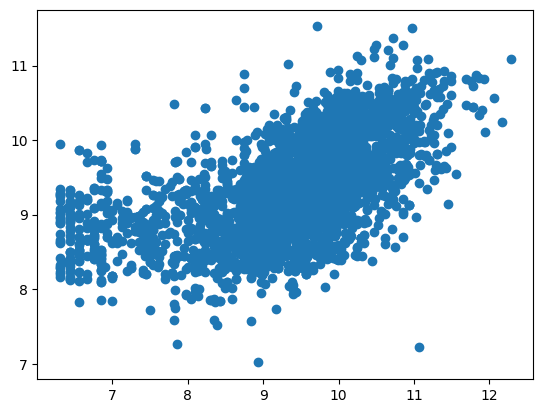

In [1856]:
y_pred = predict_model(LinearRegression(), OH_X_train, OH_X_test, y_train, y_test)
plt.scatter(y_test,y_pred)

RandomForestRegressor(random_state=1)
MSE: 0.26
MAE: 0.3
R2_score: 0.77




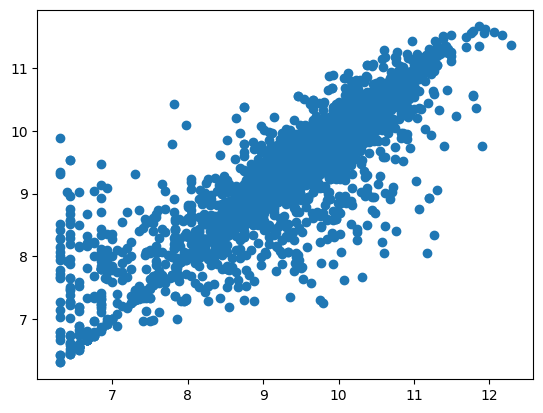

In [1857]:
y_pred = predict_model(RandomForestRegressor(random_state=1) , OH_X_train, OH_X_test, y_train, y_test)
plt.scatter(y_test,y_pred)

## Train model with new Features

In [1858]:
# Choosing Features
# Get list of categorical variables
categorical = ['Category', 'Leather interior', 'Gear box type','Wheel', 'Turbo']

no_encoding = [ 'Engine volume', 'Mileage', "Levy"]

manual_encode = ["Manufacturer", "Model"]

ordinal_encoding = ["binned_Airbags", "binned_year", "Doors"]

# Extract features and target
cleaned_df = cleaned_df.replace(np.nan, "-")

y = cleaned_df["LogPrice"]
X = cleaned_df.copy().drop(["Price", "LogPrice"], axis=1)

In [1859]:
# Ordinal Variables
from sklearn.preprocessing import LabelEncoder
for col in ordinal_encoding:
    lr =  LabelEncoder()
    X_train[col] = lr.fit_transform(X_train[col])
    X_test[col] = lr.fit_transform(X_test[col])

In [1860]:
manual_OH_train = one_hot_encoding_top_x(X_train, 'Model', top_20_model)
manual_OH_train = pd.concat([manual_OH_train, one_hot_encoding_top_x(X_train, 'Manufacturer', top_20_manufacturer)], axis=1)
manual_OH_train.index = X_train.index

manual_OH_test = one_hot_encoding_top_x(X_test, 'Model', top_20_model)
manual_OH_test =  pd.concat([manual_OH_test, one_hot_encoding_top_x(X_test, 'Manufacturer', top_20_manufacturer)], axis=1)
manual_OH_test.index = X_test.index

In [1861]:
from sklearn.preprocessing import OneHotEncoder

# Apply one hot encode to each column
OH_Encode = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_Encode.fit(X_train[categorical])
OH_train = pd.DataFrame(OH_Encode.transform(X_train[categorical]))
OH_test = pd.DataFrame(OH_Encode.transform(X_test[categorical]))

# Put index back
OH_train.index = X_train.index
OH_test.index = X_test.index


OH_X_train = pd.concat([OH_train, X_train[no_encoding + ordinal_encoding], manual_OH_train], axis=1)
OH_X_test = pd.concat([OH_test, X_test[no_encoding + ordinal_encoding], manual_OH_test], axis=1)


# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype("str")
OH_X_test.columns = OH_X_test.columns.astype("str")

In [1862]:
# Imputation
OH_X_train = OH_X_train.fillna(method="ffill", axis=0)
OH_X_train = OH_X_train.fillna(OH_X_train["Levy"].median(), axis=0)

OH_X_test = OH_X_test.fillna(method="ffill", axis=0)
OH_X_test = OH_X_test.fillna(OH_X_test["Levy"].median(), axis=0)


LinearRegression()
MSE: 0.75
MAE: 0.65
R2_score: 0.34




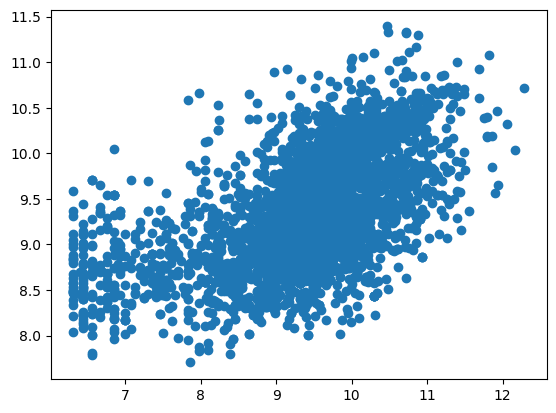

In [1863]:
y_pred = predict_model(LinearRegression(), OH_X_train, OH_X_test, y_train, y_test)
plt.scatter(y_test,y_pred)

RandomForestRegressor(random_state=1)
MSE: 0.31
MAE: 0.33
R2_score: 0.73




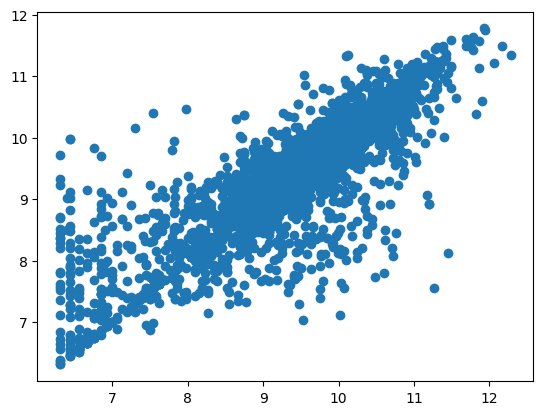

In [1864]:
y_pred = predict_model(RandomForestRegressor(random_state=1), OH_X_train, OH_X_test, y_train, y_test)
plt.scatter(y_test,y_pred)